# Australia Water Quality Monitoring Dataset
This notebook is working on the data of water quality measurements for Brisbane River, Australia. The goal of this notebook is to do exploratory data analysis (EDA) and therefore to generate the big picture description about Brisbane River's water and interesting insights of the data.

*Source*: [Queensland Government Open Data Portal](https://www.data.qld.gov.au/dataset/brisbane-river-colmslie-site-water-quality-monitoring-buoy/resource/0ec4dacc-8e78-4c2a-aa70-d7865ec098e2), as quoted by: [Daniel Fedorov](https://www.kaggle.com/downshift) in [Kaggle: Water Quality Monitoring Dataset](https://www.kaggle.com/datasets/downshift/water-quality-monitoring-dataset)

### Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### Step 2: Read the CSV File and Import the Data as a Pandas Dataframe

In [ ]:
df = pd.read_csv('/home/jasonzelin/data-analytics-portfolio/australia_water_quality_monitoring/data/brisbane_water_quality.csv')

### Step 3: Start the Exploratory Data Analysis (EDA)

Identify the shape and data types of each column existing in the dataframe

In [11]:
print("The shape of the data is ", df.shape)
print("The data types of each column are as below:\n", df.dtypes)

The shape of the data is  (30894, 20)
The data types of each column are as below:
 Timestamp                                    object
Record number                                 int64
Average Water Speed                         float64
Average Water Direction                     float64
Chlorophyll                                 float64
Chlorophyll [quality]                       float64
Temperature                                 float64
Temperature [quality]                       float64
Dissolved Oxygen                            float64
Dissolved Oxygen [quality]                  float64
Dissolved Oxygen (%Saturation)              float64
Dissolved Oxygen (%Saturation) [quality]    float64
pH                                          float64
pH [quality]                                float64
Salinity                                    float64
Salinity [quality]                          float64
Specific Conductance                        float64
Specific Conductance [quality]   

Convert column **'Timestamp'** to pandas readable **timestamp** format & dropping column 'Record number' and columns with tag '[quality]', since those columns have no significance to the analysis

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.drop(columns='Record number', inplace=True)

regexp = re.compile(pattern=r'.*(\[quality\])$')
original_column_names = df.columns
filtered_column_names = [n for n in original_column_names if not(regexp.match(n))]
df = df[filtered_column_names]

Check for missing values and fil it with median

In [31]:
print("Missing values:\n", df.isnull().sum()/df.shape[0])

Missing values:
 Timestamp                         0.000000
Average Water Speed               0.000000
Average Water Direction           0.000000
Chlorophyll                       0.000000
Temperature                       0.000000
Dissolved Oxygen                  0.000000
Dissolved Oxygen (%Saturation)    0.000000
pH                                0.000000
Salinity                          0.000000
Specific Conductance              0.044248
Turbidity                         0.000000
Day of year                       0.000000
dtype: float64


In [32]:
for i in filtered_column_names:
    column_median = df[i].median()
    df[i] = df[i].fillna(value=column_median)

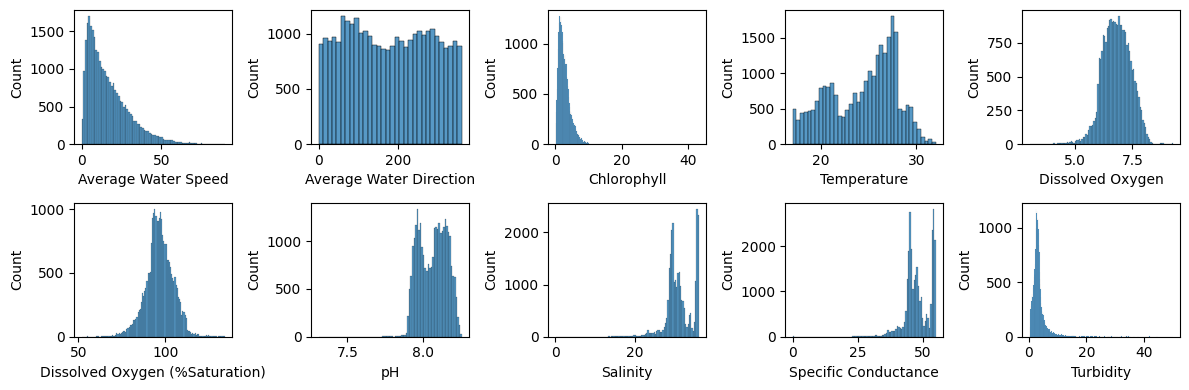

In [14]:
# Creating distribution plots
numeric_datetime_columns = df.select_dtypes(include=["number"]).columns.tolist()

# Create subplots: 4 row, 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 4))
r = 0
c = 0
for i in numeric_datetime_columns:
    sns.histplot(data=df, x=i, ax=axes[r, c])
    if (c + 1) % 5 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

plt.tight_layout()
plt.show()

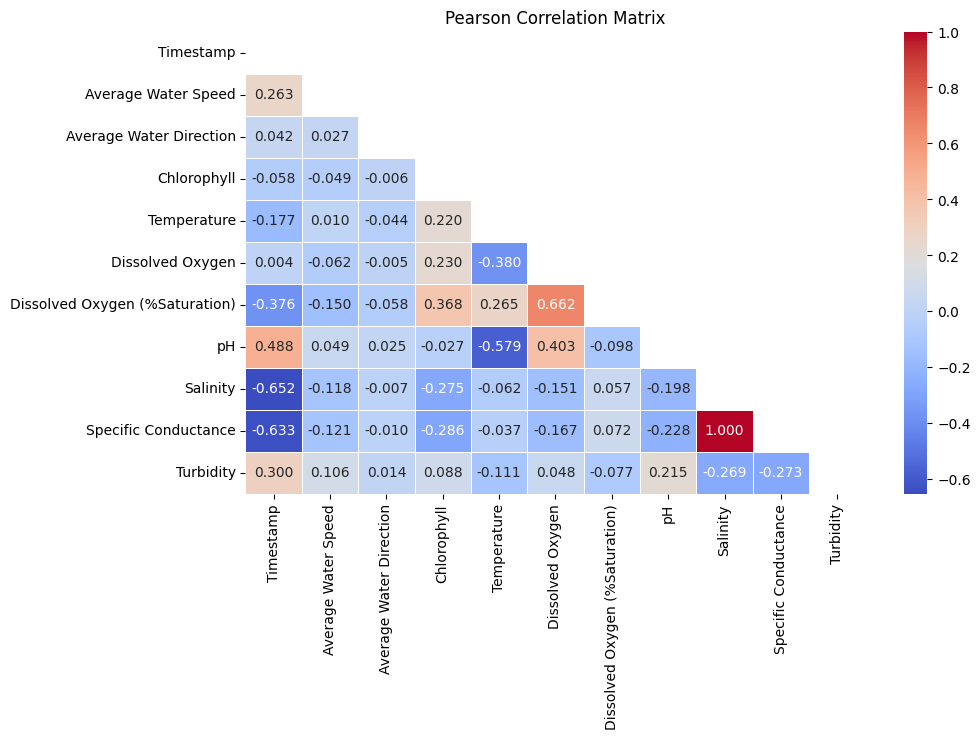

In [15]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix = correlation_matrix.round(3)
masking_matrix = np.triu(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, mask=masking_matrix)
plt.title('Pearson Correlation Matrix')
plt.show()

Several insights can be derived from the correlation plot above. Salinity positively correlates to specific conductance with 1 coefficient of correlation. Therefore, specific conductance will be removed from the analysis, as it can be simply represented by salinity. A few metrics that high correlation with time (both positive and negative) are **salinity** and **pH**. Other interesting correlations are as follows: 
- pH vs Temperature
- pH vs Dissolved Oxygen
- Dissolved Oxygen vs Temperature.

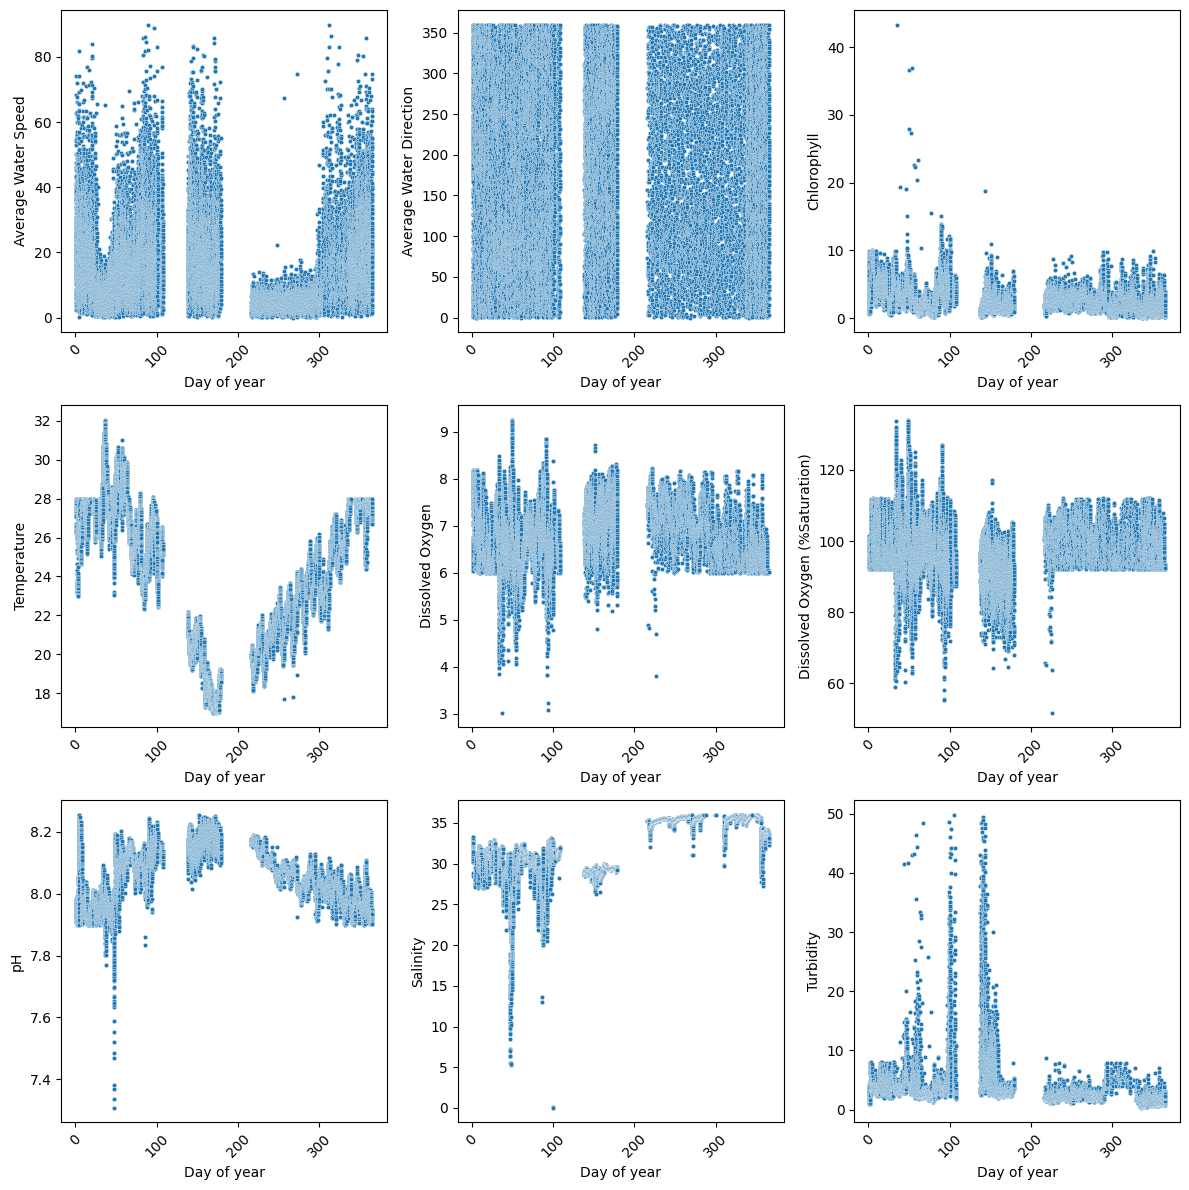

In [16]:
# Creating time series line plot
filtered_column_names.remove("Timestamp")
filtered_column_names.remove("Specific Conductance")
df['Day of year'] = df['Timestamp'].dt.dayofyear

# Create subplots: 4 row, 5 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
r = 0
c = 0
for i in filtered_column_names:
    sns.scatterplot(data=df, x='Day of year', y=i, ax=axes[r, c], s=10)
    if (c + 1) % 3 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

As it can be observed from the scatter plots above and supported by the aforementioned insights in the correlation plot, pH and salinity has a positive trend. However, it can be more clearly identified from the time series scatter plot that both **pH** and **salinity** has an inclining overall trend due to the extreme lows in around the 50th day of year (February). On the other hand, **temperature** and **turbidity** have a visible pattern with the resemblance of parabolic curves.

In [33]:
X = df[['Day of year']]
y = df['Temperature']

# Fit polynomial regression of degree 3
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [35]:
np.arange(1, 366).reshape(-1,1)

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      